# PREP

In [235]:
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wildlifeml.utils.io import (
    load_csv, 
    load_json, 
    load_pickle,
    load_image,
)
from wildlifeml.utils.datasets import render_bbox
from wildlifeml.preprocessing.cropping import Cropper

In [236]:
REPODIR = '/home/wimmerl/projects/wildlife-experiments'
IMGDIR = '/common/bothmannl/wildlife_images/usecase2/original_images/'
CFG = load_json(os.path.join(REPODIR, 'configs/cfg.json'))

In [237]:
LABEL_MAP = load_json(os.path.join(REPODIR, 'data/label_map.json'))
LABEL_DICT = {k: v for k, v in load_csv(os.path.join(CFG['data_dir'], CFG['label_file']))}
MAPPING_DICT = load_json(os.path.join(CFG['data_dir'], CFG['mapping_file']))
DETECTOR_DICT = load_json(os.path.join(CFG['data_dir'], CFG['detector_file']))
META_DF = pd.read_csv(os.path.join(CFG['data_dir'], 'metadata.csv'))

# DESCRIPTIVE

## STATS

In [238]:
cnt_ins_oos = META_DF.groupby(['station_set', 'true_class'])['orig_name'].count()
cnt_ins_oos, cnt_ins_oos.groupby(['true_class']).sum()  # Table 1

(station_set  true_class   
 s1           empty            15627
              european_hare      485
              others             941
              red_deer            26
              red_fox            708
              red_squirrel       297
              roe_deer          6074
              wild_boar          210
 s2           empty            14274
              european_hare      255
              others            1051
              red_deer           135
              red_fox            106
              red_squirrel        13
              roe_deer          7010
              wild_boar          904
 Name: orig_name, dtype: int64,
 true_class
 empty            29901
 european_hare      740
 others            1992
 red_deer           161
 red_fox            814
 red_squirrel       310
 roe_deer         13084
 wild_boar         1114
 Name: orig_name, dtype: int64)

## EXEMPLARY MISCLASSIFIED CASES

In [244]:
RESULTS_INSAMPLE = load_pickle('results/202302091209_insample.pickle')
OUR_THRESH = 0.25

In [245]:
def inspect_images(
    results, 
    label: str, 
    label_map: dict, 
    mapping_dict: dict,
    detector_dict: dict,
    n_displays: int, 
    img_dir: str,
    is_misclassified: bool,
    sorting: str  # ['asc', 'desc', 'rand']
):
    result_ranking = pd.DataFrame(
        zip(
            list(results['preds_imgs'].keys()), 
            [np.argmax(v) for v in results['preds_imgs'].values()],
            [np.max(v) for v in results['preds_imgs'].values()],
            results['truth_imgs'],
        ),
        columns=['img', 'pred_label', 'conf', 'true_label']
    )
    result_ranking = result_ranking.loc[result_ranking['true_label'] == label_map[label]]
    if is_misclassified:
        result_ranking = result_ranking.loc[result_ranking['pred_label'] != label_map[label]]

    if sorting == 'asc':
        img_keys = result_ranking.sort_values('conf')['img'][:n_displays]
    elif sorting == 'desc':
        img_keys = result_ranking.sort_values('conf', ascending=False)['img'][:n_displays]
    else: 
        img_keys = random.sample(list(result_ranking['img']), n_displays)

    for k in img_keys:
        pred_class = np.argmax(results['preds_imgs'][k])
        bbox_keys = mapping_dict[k]
        fig, ax = plt.subplots(figsize=(6, 6))
        img = load_image(os.path.join(img_dir, k))
        width, height = img.size
        x_coords, y_coords = [], []
        for bkey in bbox_keys:
            x, y = Cropper.get_absolute_coords(detector_dict[bkey].get('bbox'), (height, width))
            x_coords.append(x)
            y_coords.append(y)
        img = render_bbox(img, x_coords, y_coords)
        ax.imshow(img)
        plt.show()
        plt.close()
        pred_class_name = [k for k, v in label_map.items() if v == pred_class][0]
        conf = result_ranking.loc[result_ranking['img'] == k]['conf'].item()
        print(
            f'Image: {k}\nTrue: {label}\nPredicted: {pred_class_name}\nConfidence: {conf:.2f}'
        )


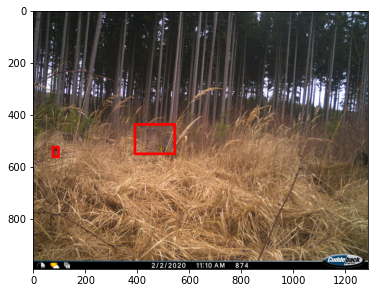

Image: 241_I_00232c.JPG
True: empty
Predicted: roe_deer
Confidence: 0.99


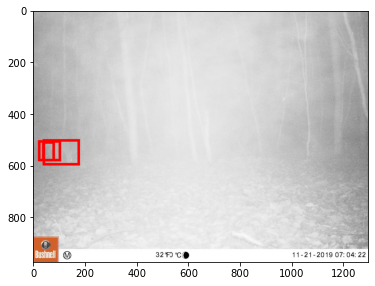

Image: 8135_11210263.JPG
True: empty
Predicted: roe_deer
Confidence: 0.97


Image: 174_I_00233c.JPG
True: empty
Predicted: roe_deer
Confidence: 0.96


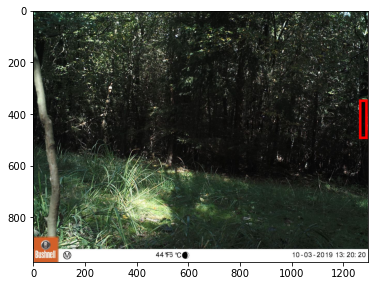

Image: 48751_10030108.JPG
True: empty
Predicted: others
Confidence: 0.80


Image: 48610_02100961.JPG
True: empty
Predicted: red_fox
Confidence: 0.78


Image: 715_I_00240b.JPG
True: empty
Predicted: roe_deer
Confidence: 0.76


Image: 19859_I_00101b.JPG
True: empty
Predicted: roe_deer
Confidence: 0.73


Image: 48164_01270624.JPG
True: empty
Predicted: others
Confidence: 0.71


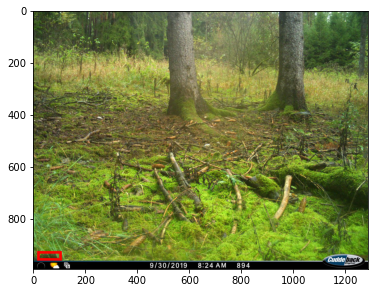

Image: 19661_I_00035b.JPG
True: empty
Predicted: roe_deer
Confidence: 0.69


Image: 8006_11210267.JPG
True: empty
Predicted: roe_deer
Confidence: 0.67


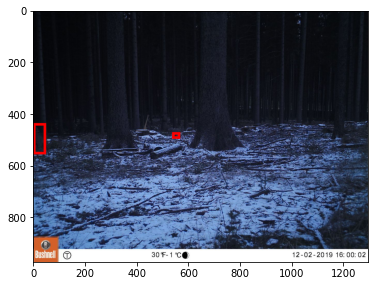

Image: 4495_12020051.JPG
True: empty
Predicted: roe_deer
Confidence: 0.65


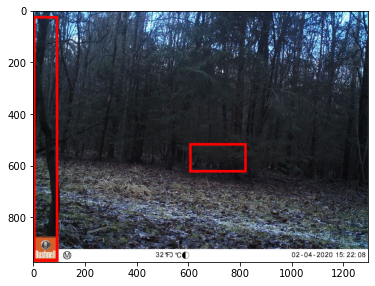

Image: 46836_02040821.JPG
True: empty
Predicted: roe_deer
Confidence: 0.65


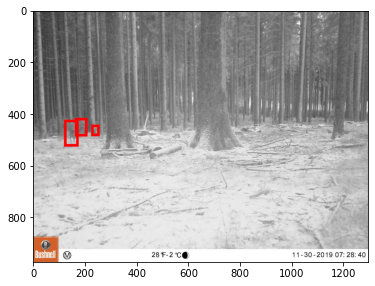

Image: 4899_11300898.JPG
True: empty
Predicted: roe_deer
Confidence: 0.63


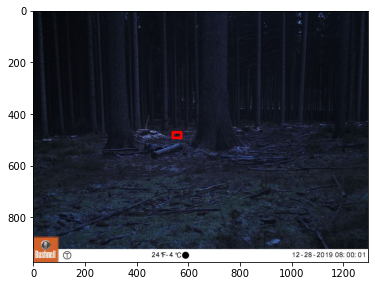

Image: 5545_12280043.JPG
True: empty
Predicted: others
Confidence: 0.62


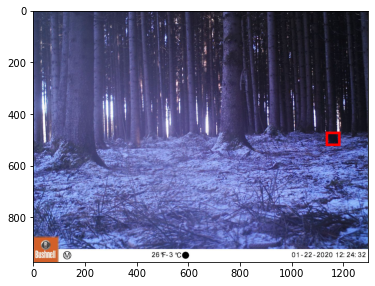

Image: 55419_01220012.JPG
True: empty
Predicted: others
Confidence: 0.62


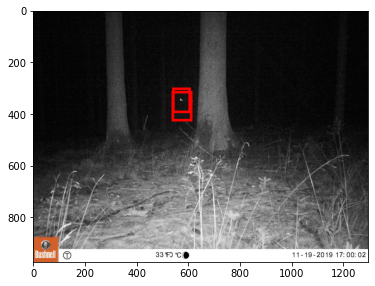

Image: 5284_11190530.JPG
True: empty
Predicted: others
Confidence: 0.59


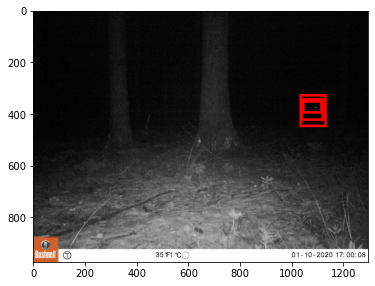

Image: 6248_01100441.JPG
True: empty
Predicted: others
Confidence: 0.58


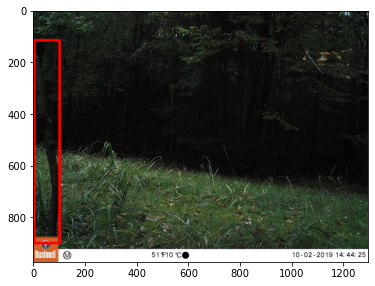

Image: 46988_10020089.JPG
True: empty
Predicted: others
Confidence: 0.58


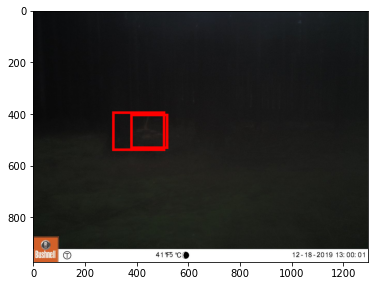

Image: 4915_12180692.JPG
True: empty
Predicted: roe_deer
Confidence: 0.56


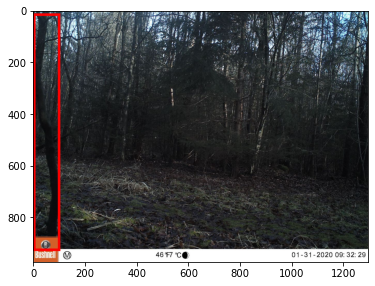

Image: 48840_01310687.JPG
True: empty
Predicted: others
Confidence: 0.55


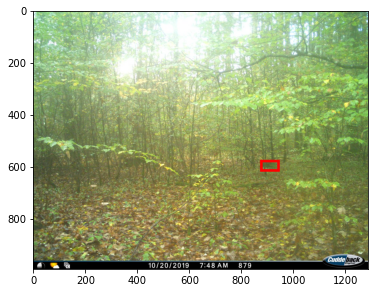

Image: 8664_I_00198c.JPG
True: empty
Predicted: others
Confidence: 0.55


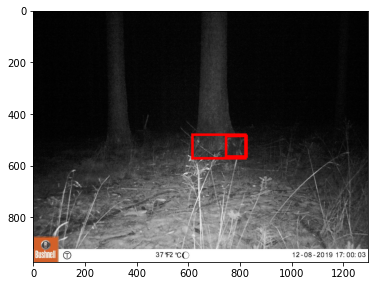

Image: 7548_12080288.JPG
True: empty
Predicted: roe_deer
Confidence: 0.54


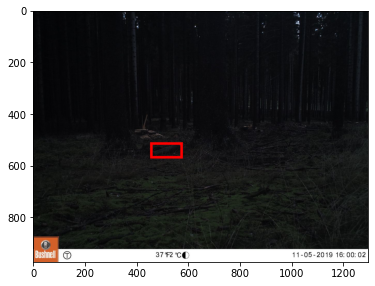

Image: 3460_11050969.JPG
True: empty
Predicted: roe_deer
Confidence: 0.53


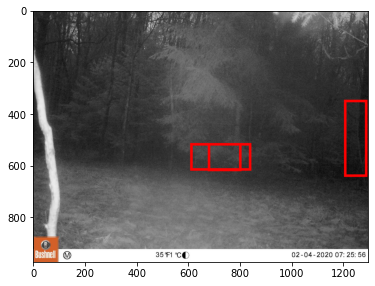

Image: 48896_02040808.JPG
True: empty
Predicted: roe_deer
Confidence: 0.53


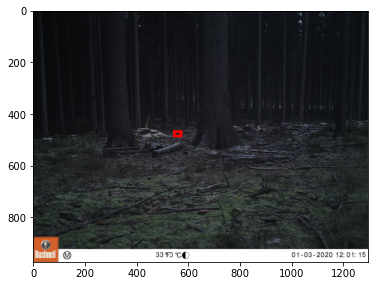

Image: 6203_01030650.JPG
True: empty
Predicted: roe_deer
Confidence: 0.52


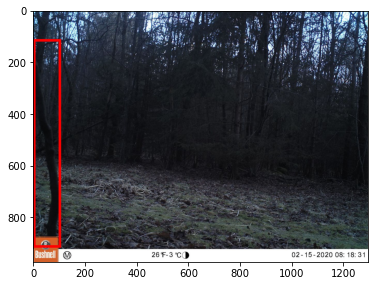

Image: 47748_02150060.JPG
True: empty
Predicted: roe_deer
Confidence: 0.51


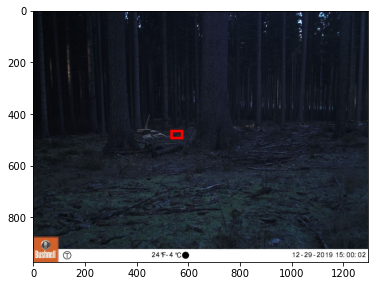

Image: 4334_12290163.JPG
True: empty
Predicted: roe_deer
Confidence: 0.51


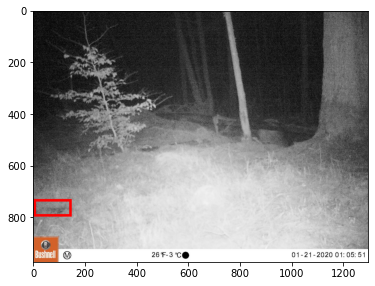

Image: 11865_01210416.JPG
True: empty
Predicted: others
Confidence: 0.50


In [ ]:
inspect_images(
    results=results, 
    label='empty',
    label_map=LABEL_MAP,
    mapping_dict=MAPPING_DICT,
    detector_dict=DETECTOR_DICT,
    n_displays=100,
    img_dir=IMGDIR,
    is_misclassified=True,
    sorting='desc'
)